In [2]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [10]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [4]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [77]:
df.shape

(1000, 40)

In [11]:
#Converting policy bind date and incident date to day,month,year format

df["policy_bind_date"]=pd.to_datetime(df['policy_bind_date'])
df["policy_bind_month"]=df["policy_bind_date"].apply(lambda x:x.month)
df["policy_bind_day"]=df["policy_bind_date"].apply(lambda x:x.day)
df["policy_bind_year"]=df["policy_bind_date"].apply(lambda x:x.year)

In [12]:
df["incident_date"]=pd.to_datetime(df['incident_date'])
df["incident_month"]=df["incident_date"].apply(lambda x:x.month)
df["incident_day"]=df["incident_date"].apply(lambda x:x.day)
df["incident_year"]=df["incident_date"].apply(lambda x:x.year)

In [13]:
df.drop(columns=["policy_bind_date","incident_date"],axis=1,inplace=True)

In [8]:
df

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,_c39,policy_bind_month,policy_bind_day,policy_bind_year,incident_month,incident_day,incident_year
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,Y,NaN,10,17,2014,1,25,2015
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,Y,NaN,6,27,2006,1,21,2015
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,N,NaN,6,9,2000,2,22,2015
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,Y,NaN,5,25,1990,10,1,2015
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,N,NaN,6,6,2014,2,17,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,Accord,2006,N,NaN,7,16,1991,2,22,2015
996,285,41,186934,IL,100/300,1000,1436.79,0,608177,FEMALE,...,Passat,2015,N,NaN,5,1,2014,1,24,2015
997,130,34,918516,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,Impreza,1996,N,NaN,2,17,2003,1,23,2015
998,458,62,533940,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,A5,1998,N,NaN,11,18,2011,2,26,2015


# Univariate Analysis

In [21]:
df_cat=df.select_dtypes(include=["object"])
col2=df_cat.columns.values

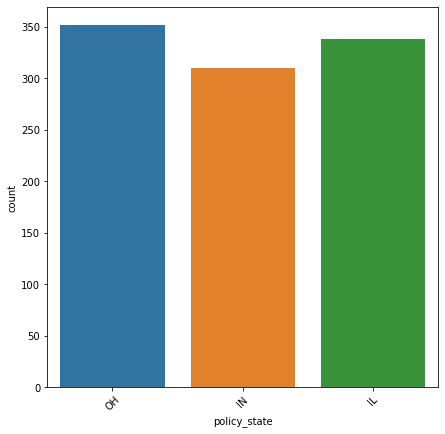

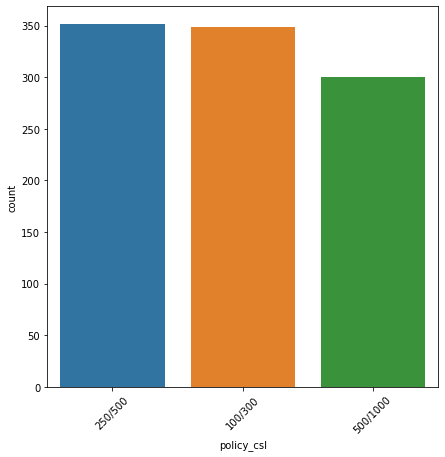

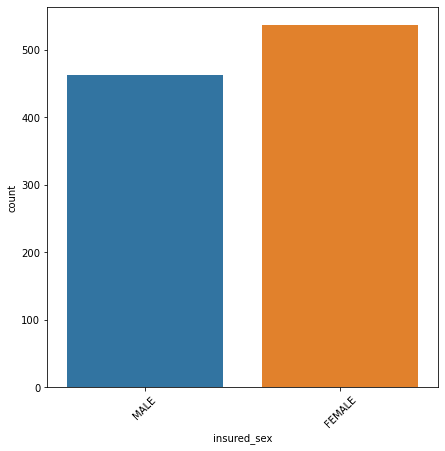

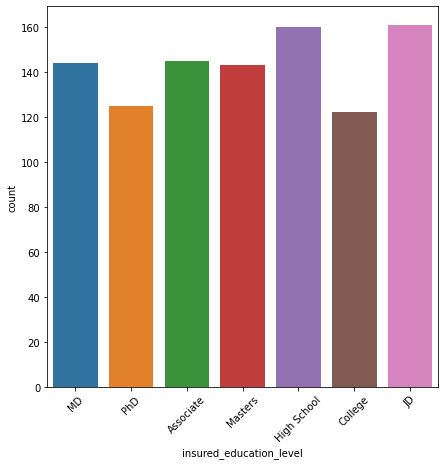

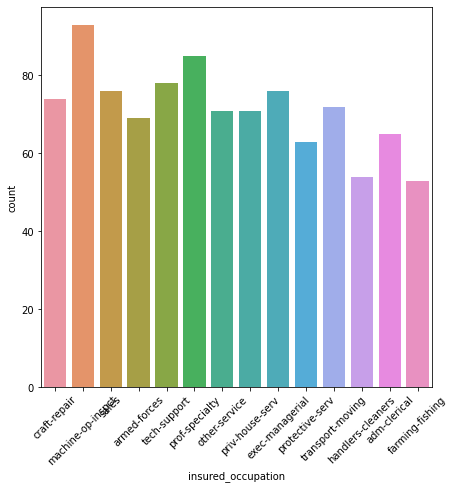

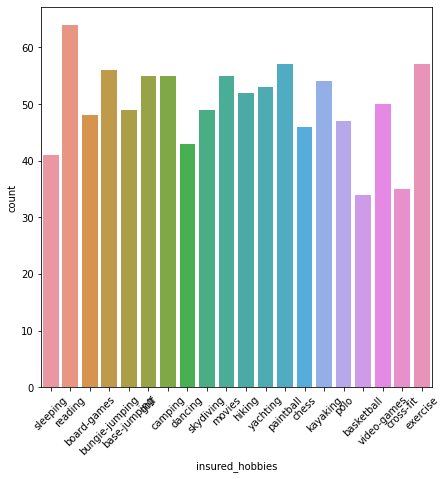

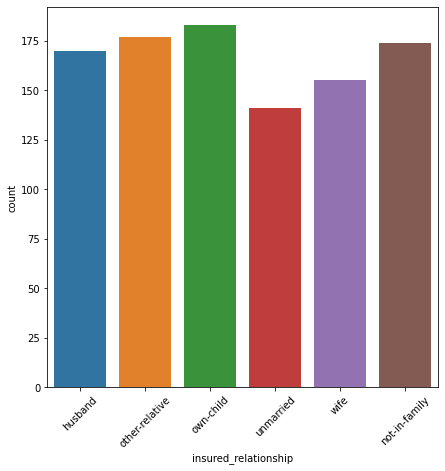

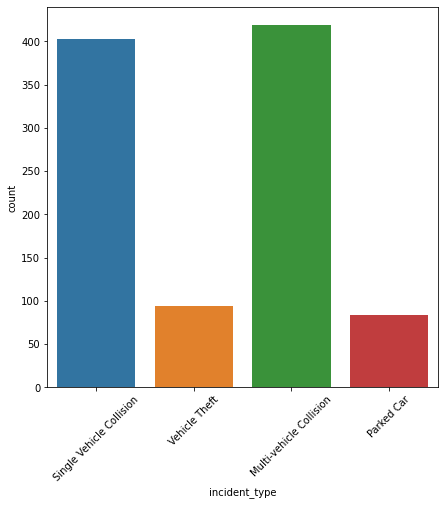

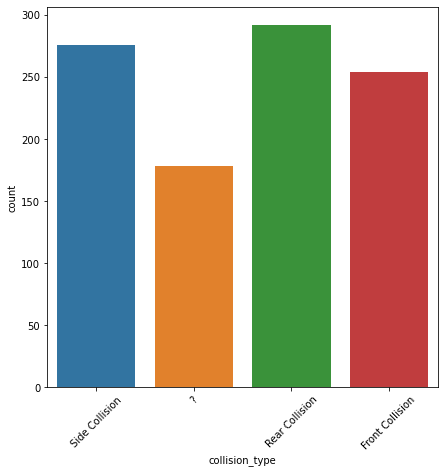

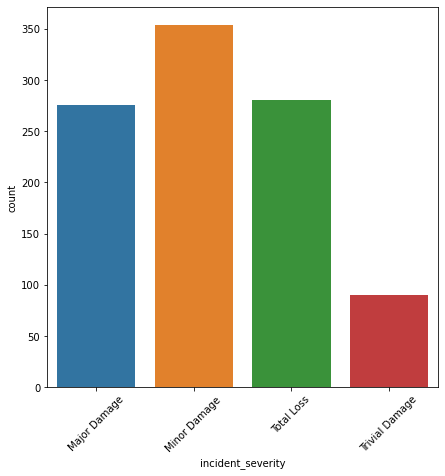

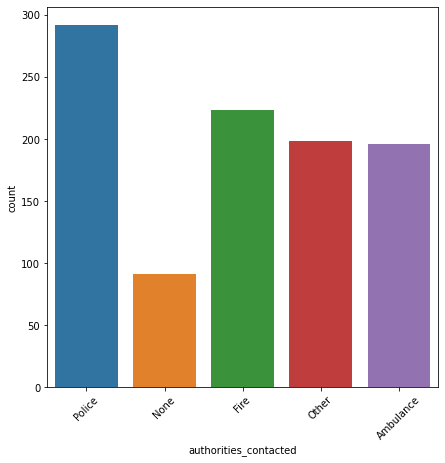

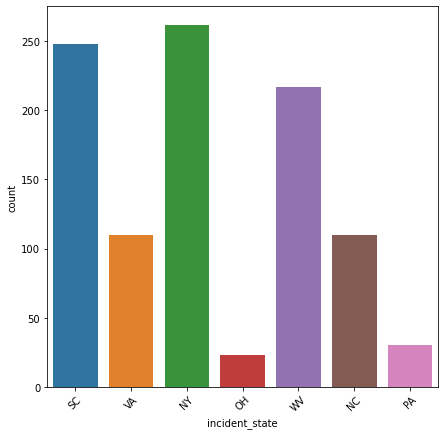

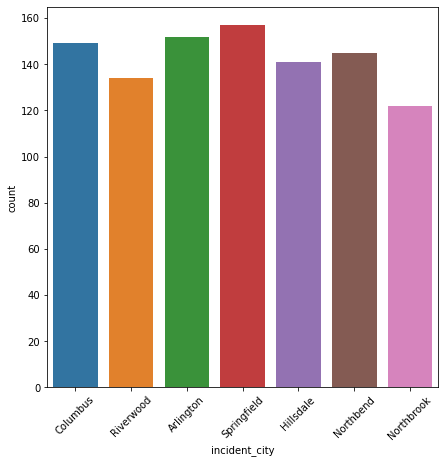

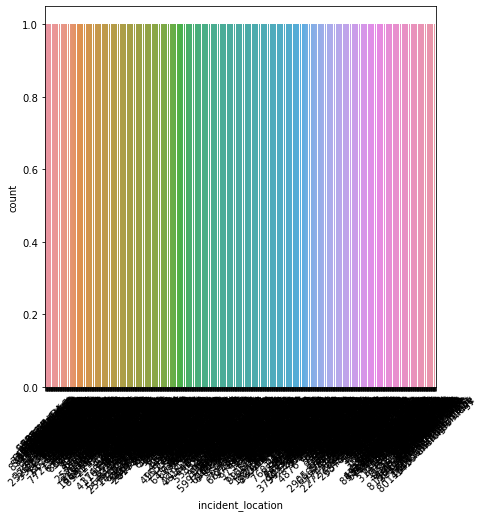

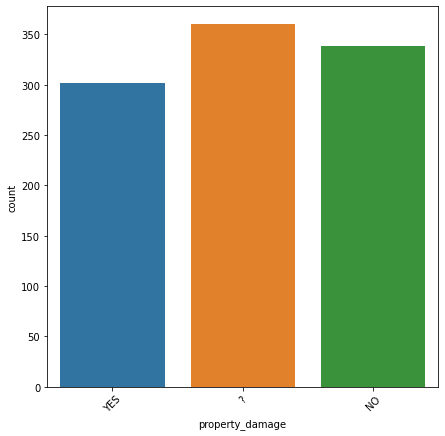

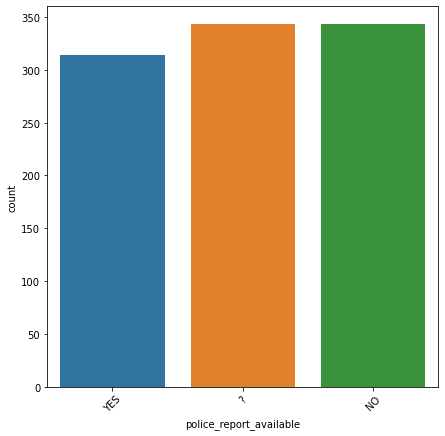

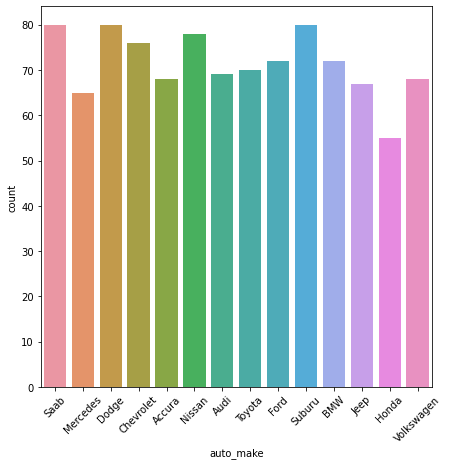

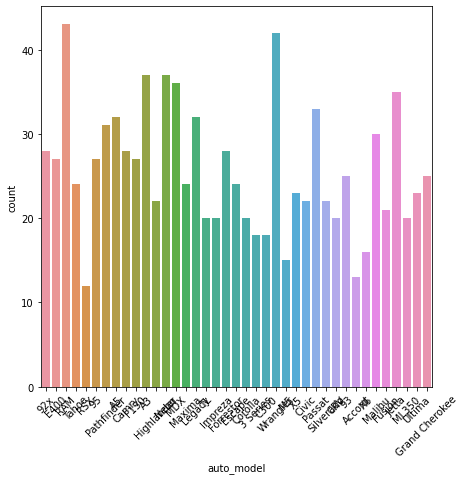

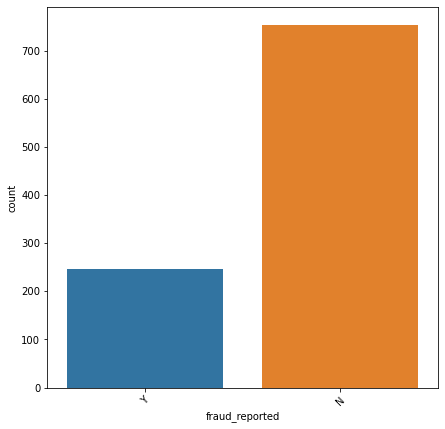

In [23]:
for i in col2:
    plt.figure(figsize=(7,7))
    sns.countplot(df_cat[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#350 applicants belong to OH policy state
#Policy_csl of 250/500 are higher in number followed by 100/300.
#550 insured members are females and 460 members are males.
#160 insured members are Junior Doctors,160 members are High School Graduates
#Majority of the insured members are machine-op-inspectors followed by prof-specciality
#Insured members have hobbies as Reading,exercise and paintball
#180 insured members are own-child in their family
#420 incidents are due to multi-vehicle collision, 400 incidents are due to single vehicle collision
#Collision type has null values,280 are rear collision type
#350 incidents are minor damage in nature, 280 incidents are of total loss severity 
#290 applicants have contacted the police followed by 225 have contacted the Fire department.
#Most of the incident states are NY followed by SC and WV
#Springfield has the most number of insurance claims followed by Arlington,Columbus,Northbend,Hillsdale,Riverwood and Northbrook
#Property damage has null values which will be treated, 325 claims have no property damage a nd 300 claims have property damage
#Police report availablity has null values, 340 claims have no police report and 320 have police report
#Fraud Reported claims are less than fraud not reported.

In [24]:
df_cont=df.select_dtypes(include=["int64","float64"])
col3=df_cont.columns.values

In [25]:
df_cont

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,...,property_claim,vehicle_claim,auto_year,_c39,policy_bind_month,policy_bind_day,policy_bind_year,incident_month,incident_day,incident_year
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,...,13020,52080,2004,NaN,10,17,2014,1,25,2015
1,228,42,342868,2000,1197.22,5000000,468176,0,0,8,...,780,3510,2007,NaN,6,27,2006,1,21,2015
2,134,29,687698,2000,1413.14,5000000,430632,35100,0,7,...,3850,23100,2007,NaN,6,9,2000,2,22,2015
3,256,41,227811,2000,1415.74,6000000,608117,48900,-62400,5,...,6340,50720,2014,NaN,5,25,1990,10,1,2015
4,228,44,367455,1000,1583.91,6000000,610706,66000,-46000,20,...,650,4550,2009,NaN,6,6,2014,2,17,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,431289,0,0,20,...,8720,61040,2006,NaN,7,16,1991,2,22,2015
996,285,41,186934,1000,1436.79,0,608177,70900,0,23,...,18080,72320,2015,NaN,5,1,2014,1,24,2015
997,130,34,918516,500,1383.49,3000000,442797,35100,0,4,...,7500,52500,1996,NaN,2,17,2003,1,23,2015
998,458,62,533940,2000,1356.92,5000000,441714,0,0,2,...,5220,36540,1998,NaN,11,18,2011,2,26,2015


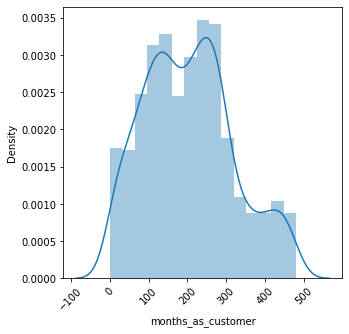

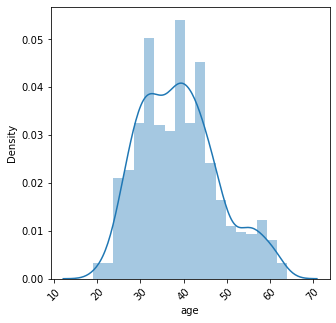

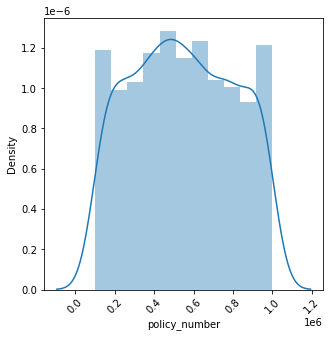

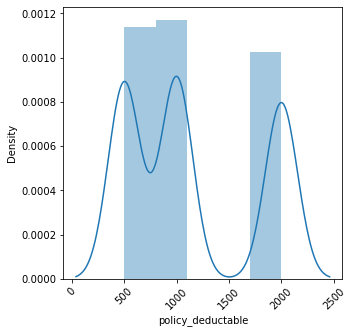

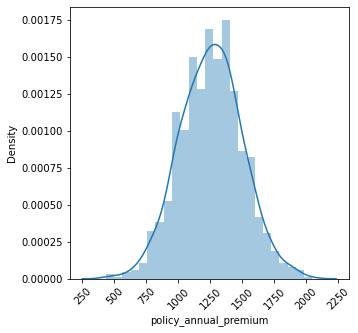

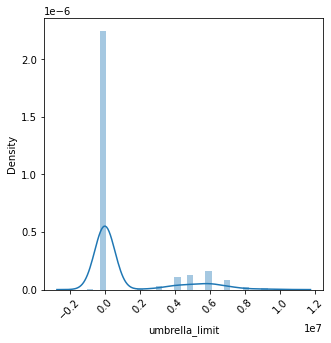

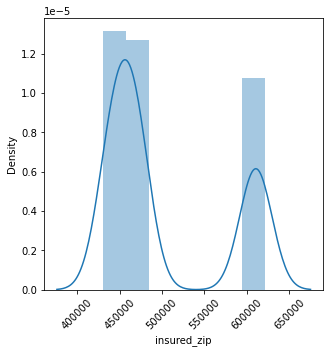

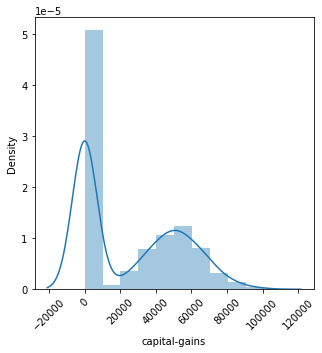

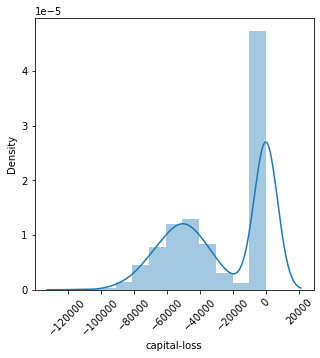

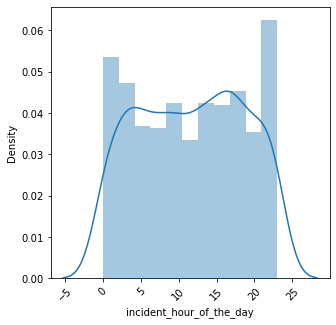

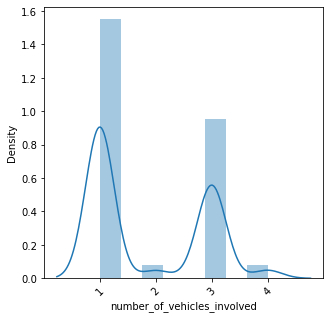

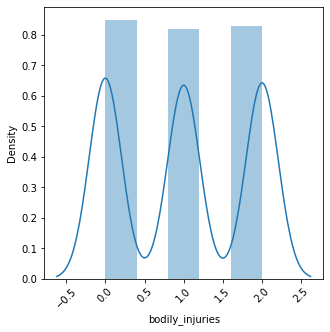

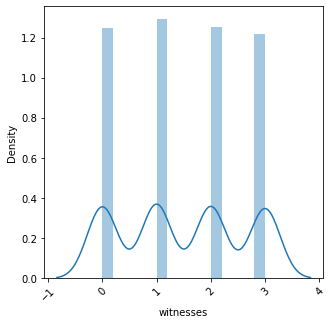

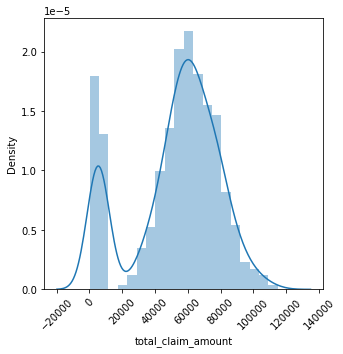

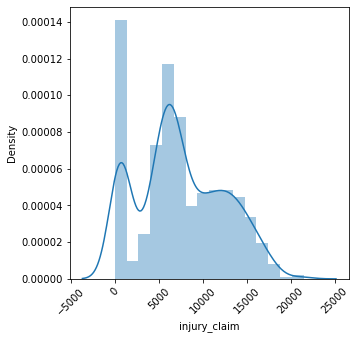

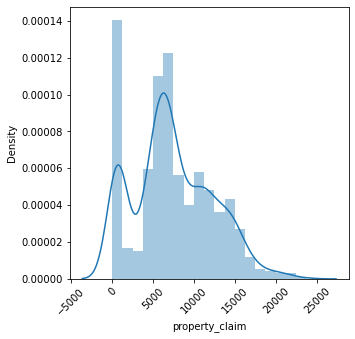

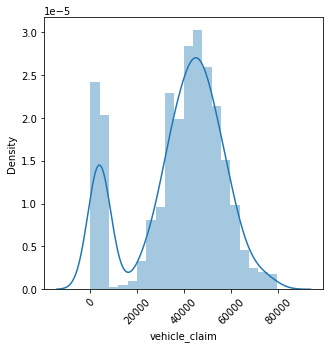

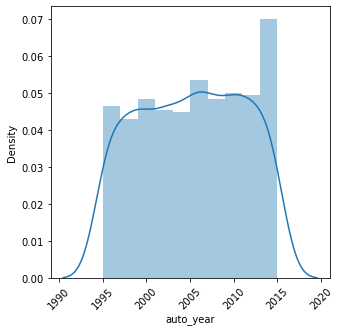

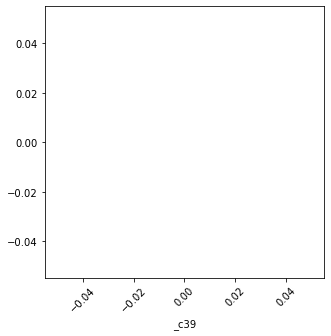

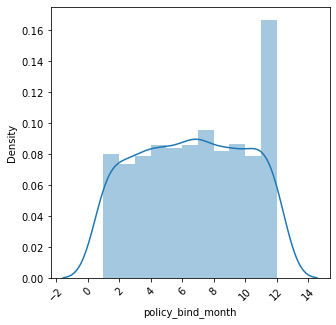

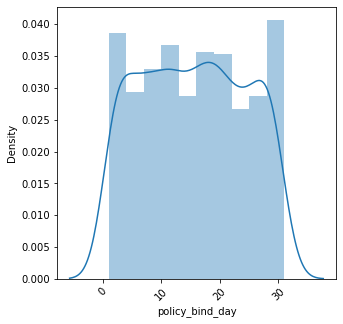

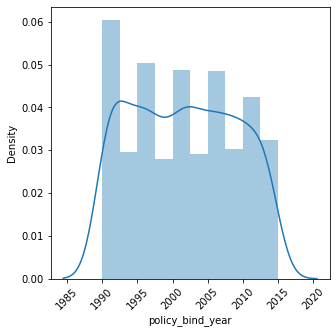

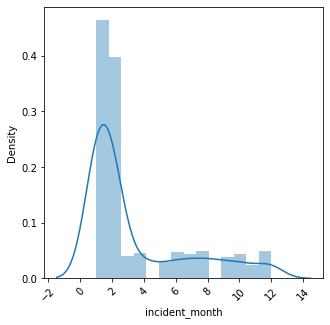

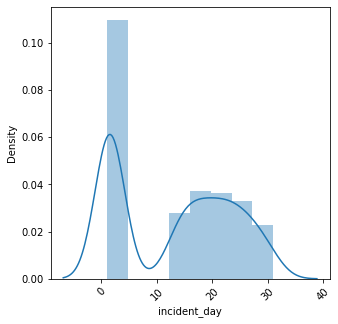

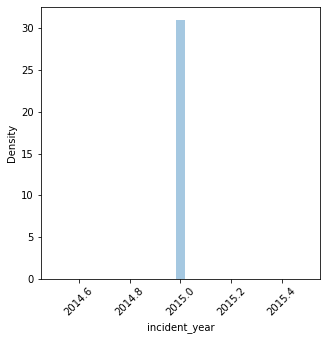

In [26]:
for i in col3:
    plt.figure(figsize=(5,5))
    sns.distplot(df_cont[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#All the incident claims are for year 2015
#Most of the incident months are from January-March and in the first week of the month.
#Policy-bind-year are ranging from 1990 to 2015
#Most of the incidents are peaked at late night from 10-11PM
#Usually in most of the claims 1 vehicle is only involved followed by 3 vehicles.
#The incidents are usually involving no,1 and 2 body injuries.
#Either there are no witnesses or 1,2 or 3 witnesses in the claims
#Claim amount ranging from 0-120000, and there are two peaks ,one peak from 20000 to 100000 and second peak from 0 to 10000.

# Bivariate Analysis

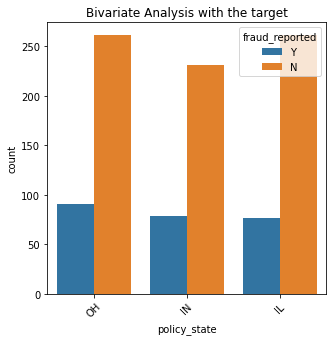

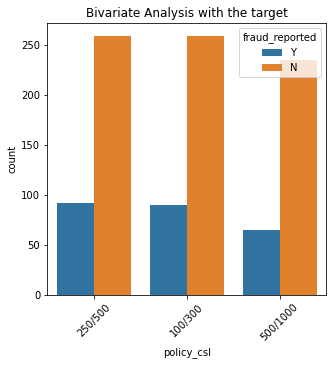

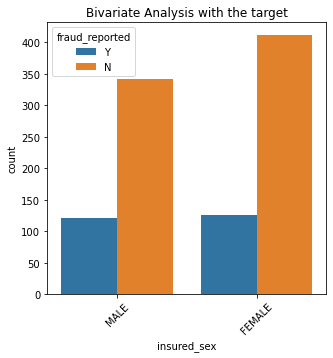

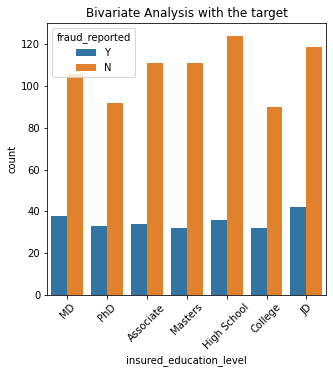

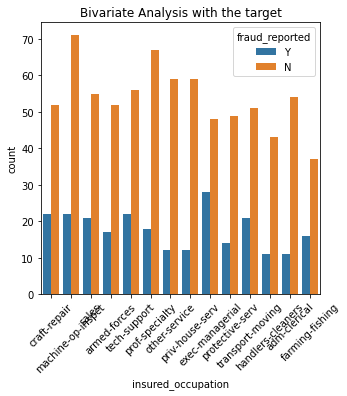

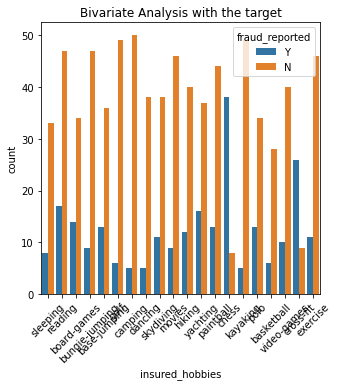

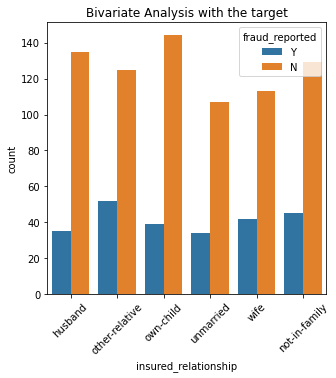

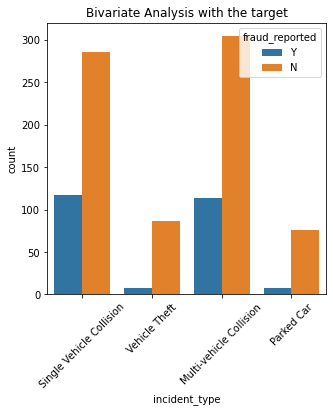

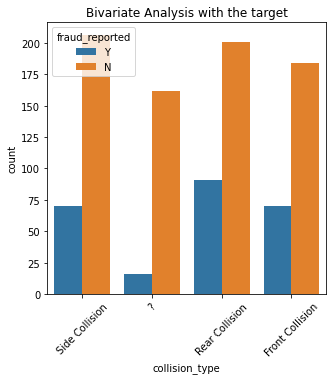

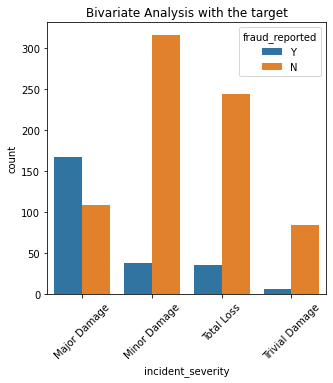

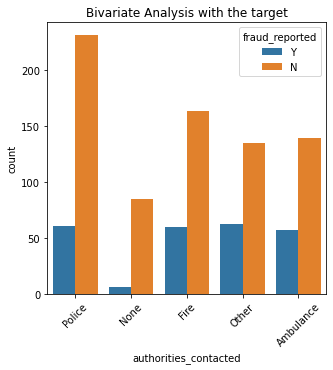

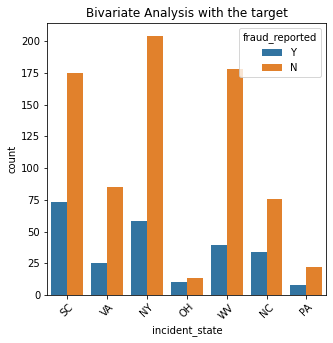

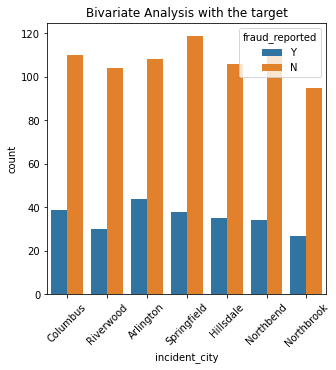

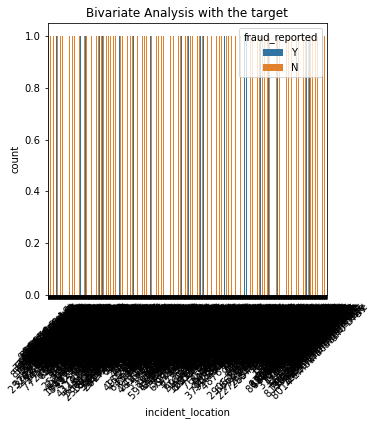

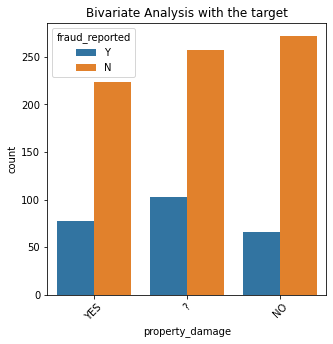

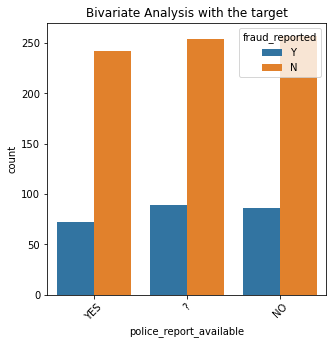

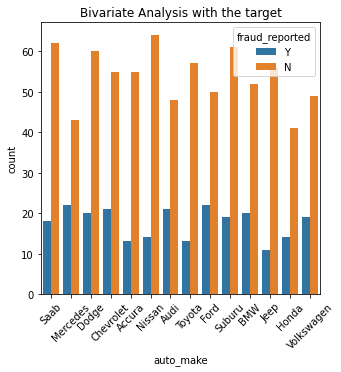

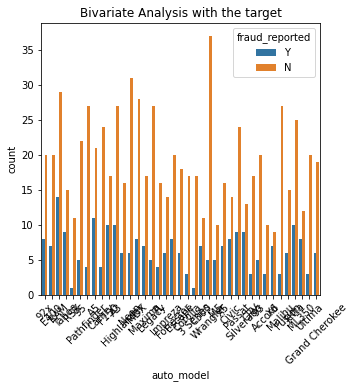

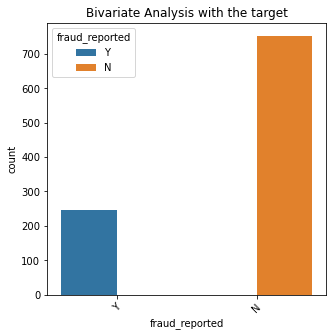

In [30]:
for i in col2:
    plt.figure(figsize=(5,5))
    sns.countplot(df_cat[i],hue=df_cat["fraud_reported"])
    plt.xlabel(i)
    plt.title("Bivariate Analysis with the target")
    plt.xticks(rotation=45)
    plt.show()
    
#OH Policy state has high number of frauds reported followed by IN and IL
#Female insured members have more number of frauds than male
#JD education level of insured members have more frauds reported followed by MD,High-school and Associate
#Private house servants have more frauds reported followed by craft-repair, tech-support
#When the insured member's relationship is other-relative, the frauds reported are higher.
#Single vehicle collision type has more number of frauds reported.


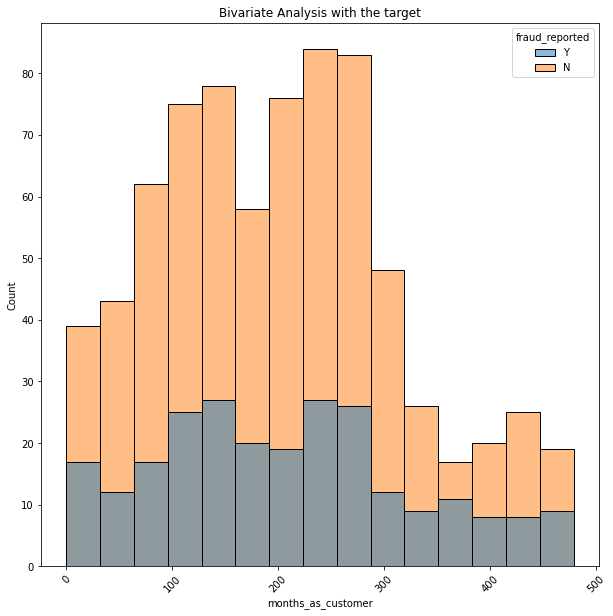

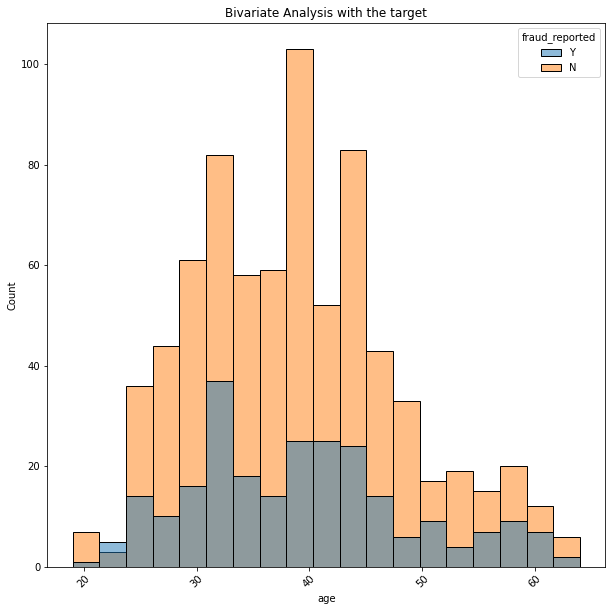

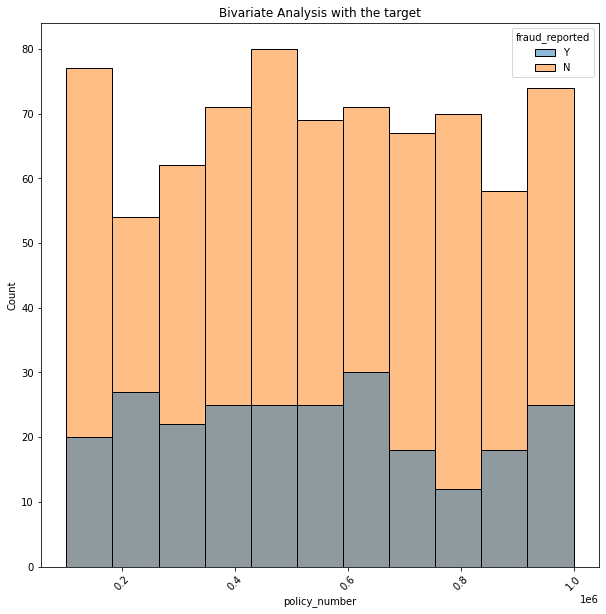

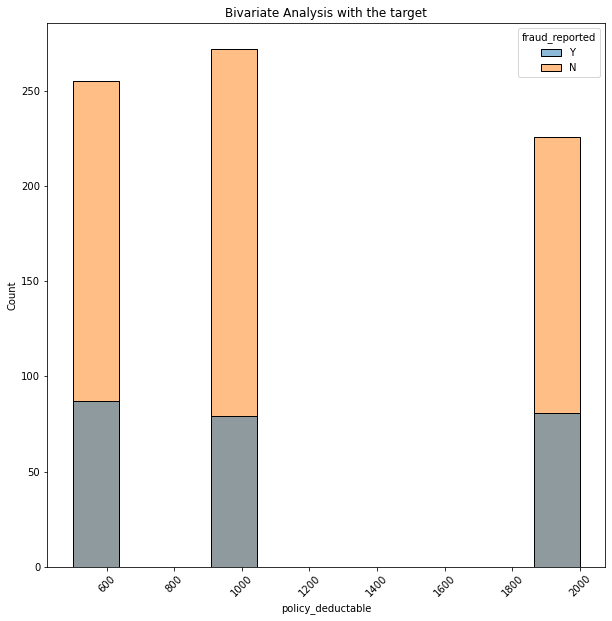

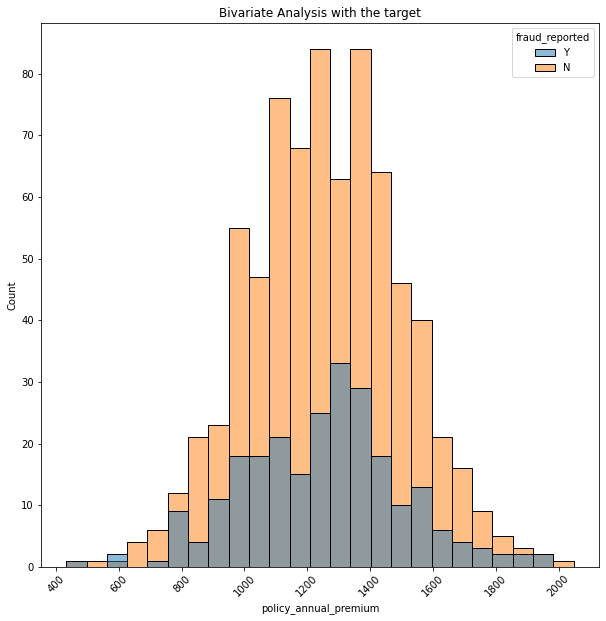

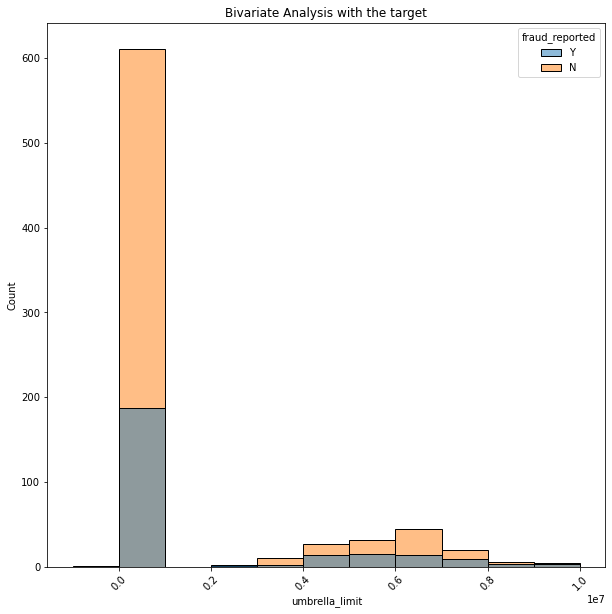

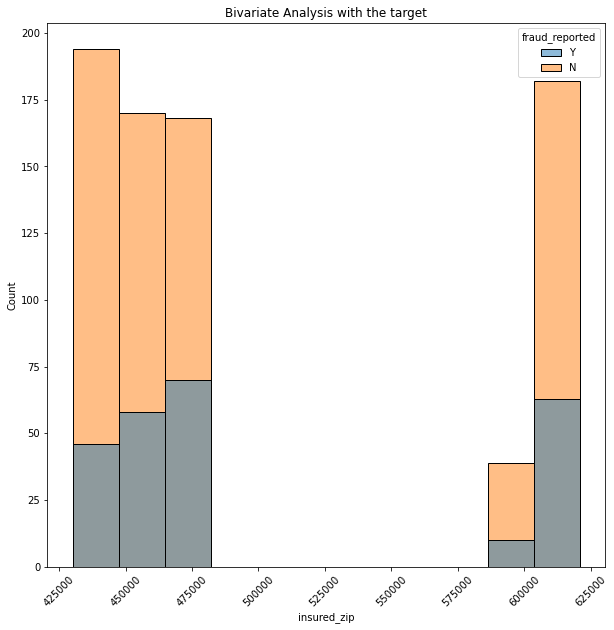

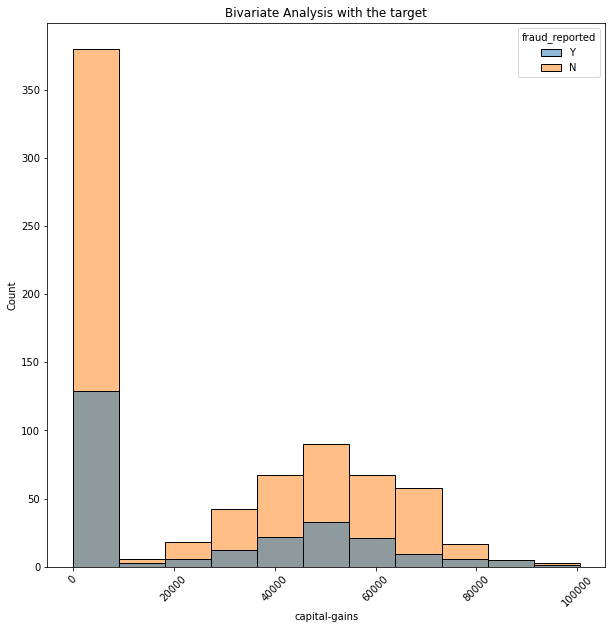

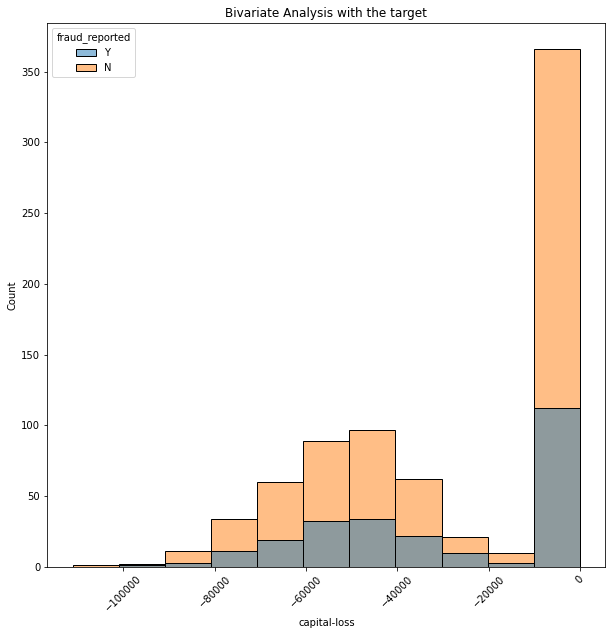

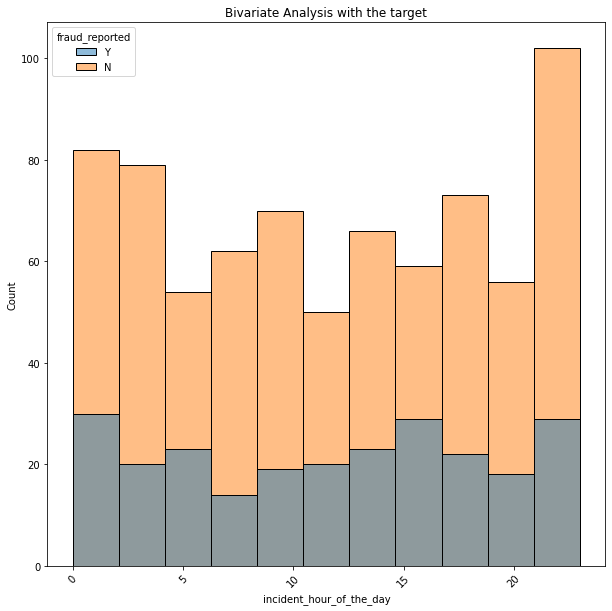

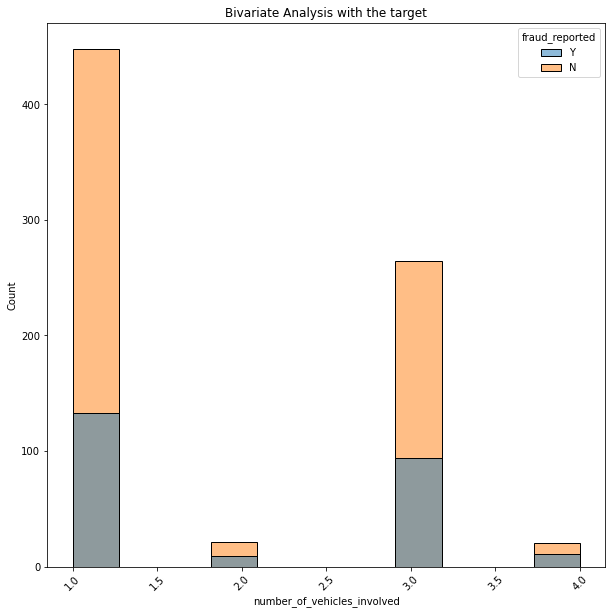

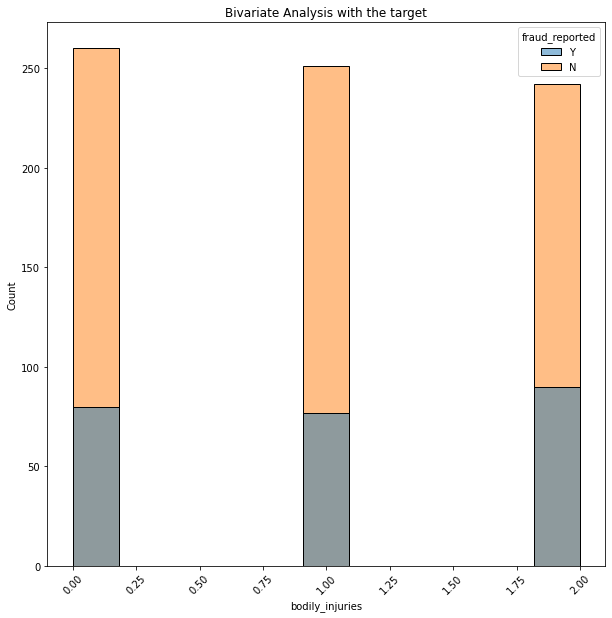

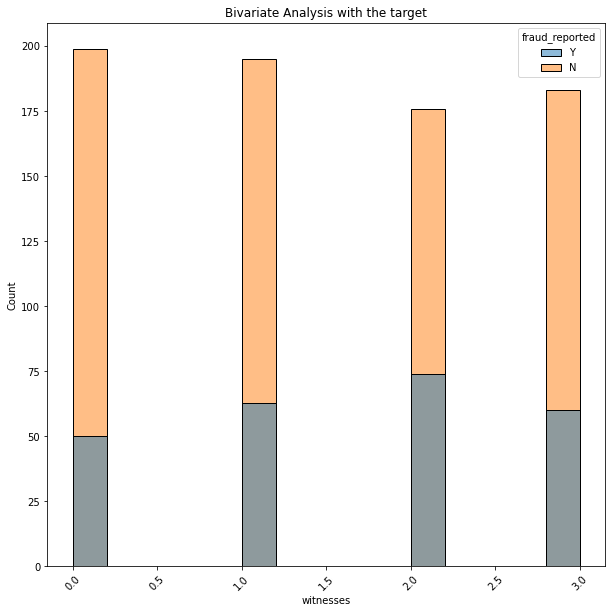

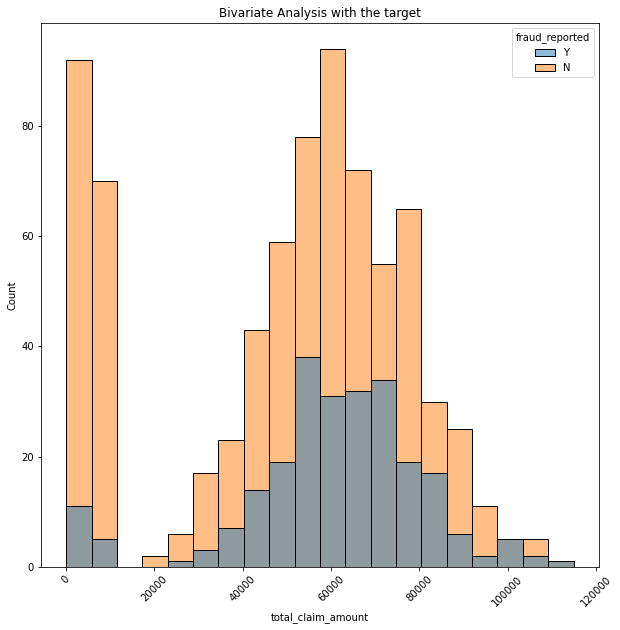

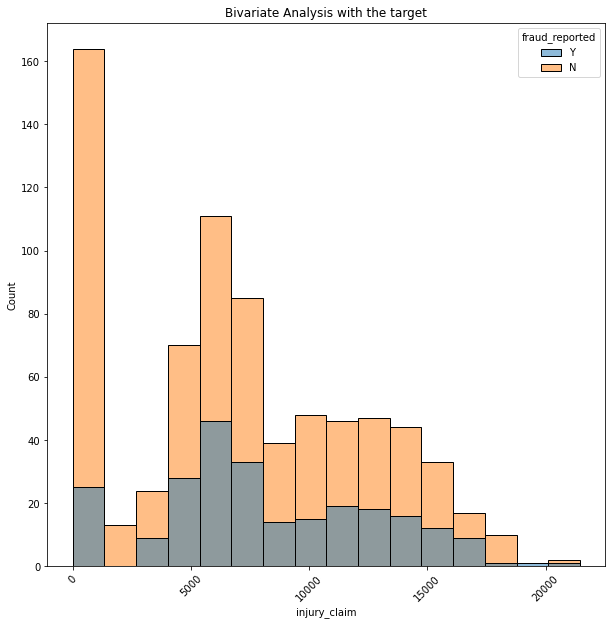

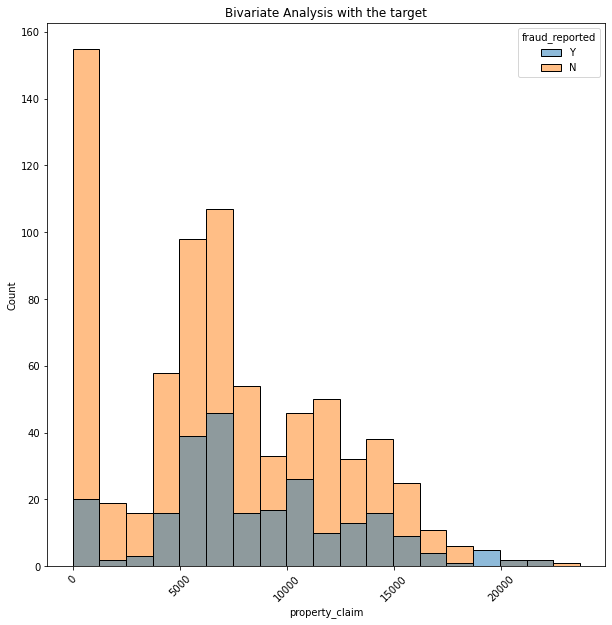

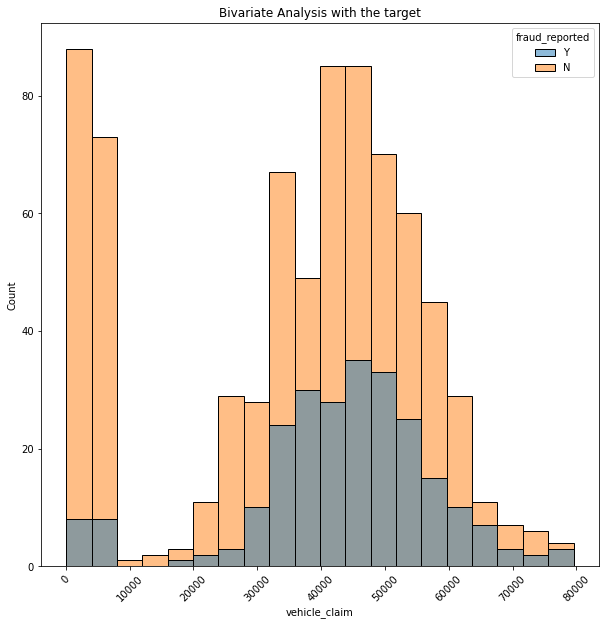

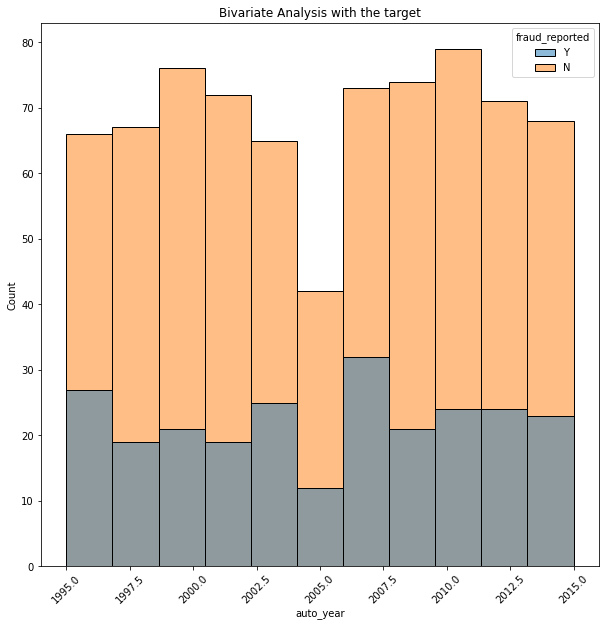

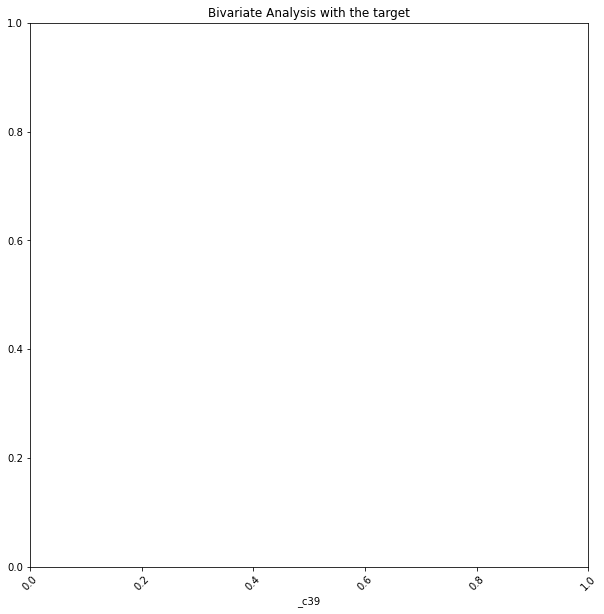

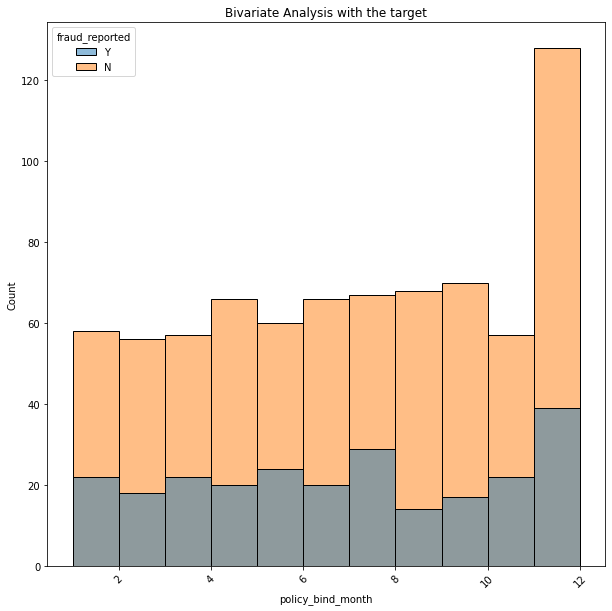

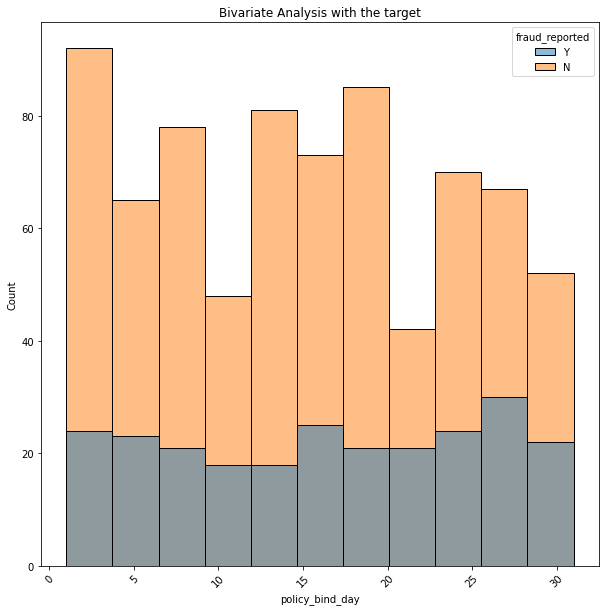

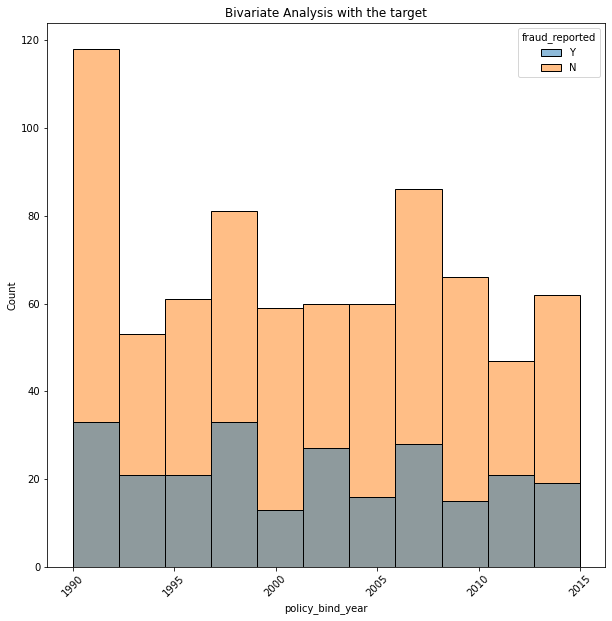

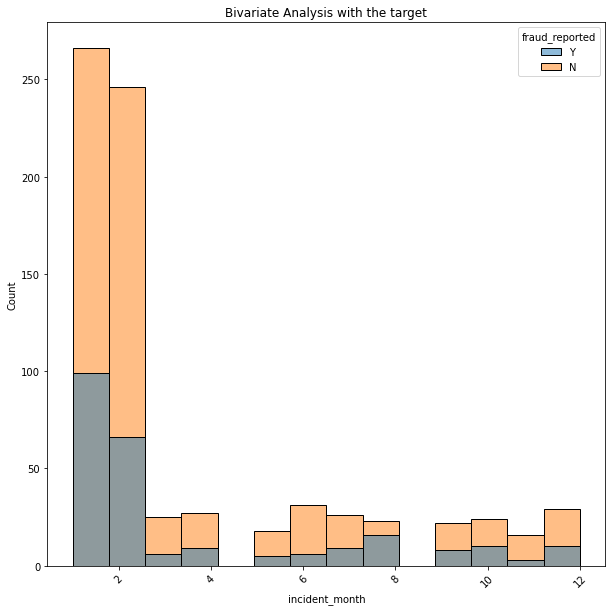

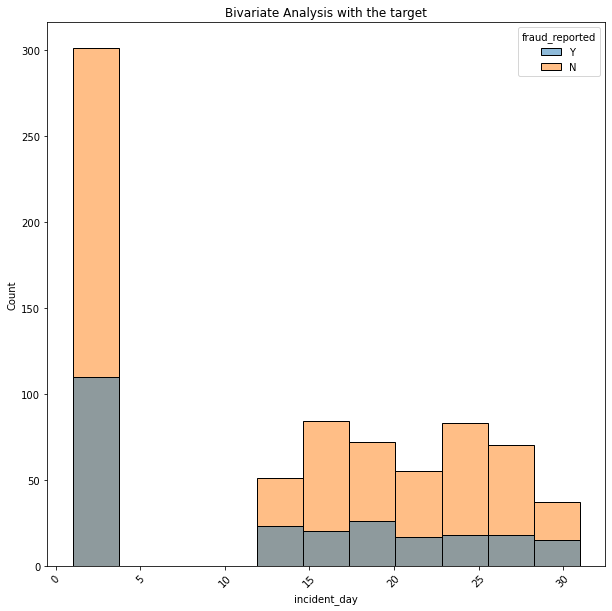

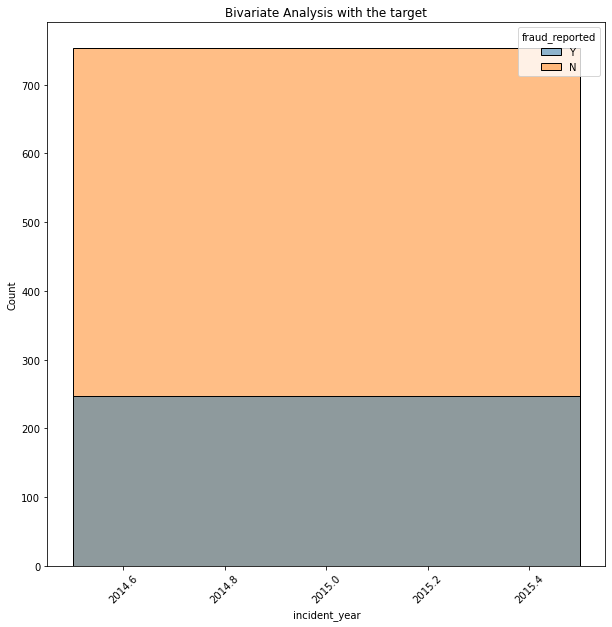

In [38]:
for i in col3:
    plt.figure(figsize=(10,10))
    sns.histplot(x=df_cont[i],hue=df_cat["fraud_reported"])
    plt.xlabel(i)
    plt.title("Bivariate Analysis with the target")
    plt.xticks(rotation=45)
    plt.show()
    
#150 months as a customer has higher fraud reported followed by 250 months
#30-33 years members have high fraud reported

In [169]:
for i in col2:
    print("The unique values of column", i,"are",len(df[i].unique()))

The unique values of column policy_state are 3
The unique values of column policy_csl are 3
The unique values of column insured_sex are 2
The unique values of column insured_education_level are 7
The unique values of column insured_occupation are 14
The unique values of column insured_hobbies are 20
The unique values of column insured_relationship are 6
The unique values of column incident_type are 4
The unique values of column collision_type are 4
The unique values of column incident_severity are 4
The unique values of column authorities_contacted are 5
The unique values of column incident_state are 7
The unique values of column incident_city are 7
The unique values of column incident_location are 1000
The unique values of column property_damage are 3
The unique values of column police_report_available are 3
The unique values of column auto_make are 14
The unique values of column auto_model are 39
The unique values of column fraud_reported are 2


In [195]:
df["incident_year"].unique()

array([2015], dtype=int64)

# Data Cleaning

#### 1. Removing _c39 column since it has no data

In [14]:
df.drop(columns=["_c39","incident_location","incident_year"],axis=1,inplace=True)

#### 2. Encoding Categorical Columns

In [15]:
dc=df.select_dtypes(include=["object"])
col_enc=dc.columns.values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
for i in col_enc:
    df[i]=le.fit_transform(df[i])

In [17]:
df.corr()["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_day                0.060643
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
incident_month                 0.014495
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
policy_bind_year              -0.000059


#### 3. Removing Outliers

months_as_customer                AxesSubplot(0.125,0.125;0.0158163x0.755)
age                             AxesSubplot(0.14398,0.125;0.0158163x0.755)
policy_number                  AxesSubplot(0.162959,0.125;0.0158163x0.755)
policy_state                   AxesSubplot(0.181939,0.125;0.0158163x0.755)
policy_csl                     AxesSubplot(0.200918,0.125;0.0158163x0.755)
policy_deductable              AxesSubplot(0.219898,0.125;0.0158163x0.755)
policy_annual_premium          AxesSubplot(0.238878,0.125;0.0158163x0.755)
umbrella_limit                 AxesSubplot(0.257857,0.125;0.0158163x0.755)
insured_zip                    AxesSubplot(0.276837,0.125;0.0158163x0.755)
insured_sex                    AxesSubplot(0.295816,0.125;0.0158163x0.755)
insured_education_level        AxesSubplot(0.314796,0.125;0.0158163x0.755)
insured_occupation             AxesSubplot(0.333776,0.125;0.0158163x0.755)
insured_hobbies                AxesSubplot(0.352755,0.125;0.0158163x0.755)
insured_relationship     

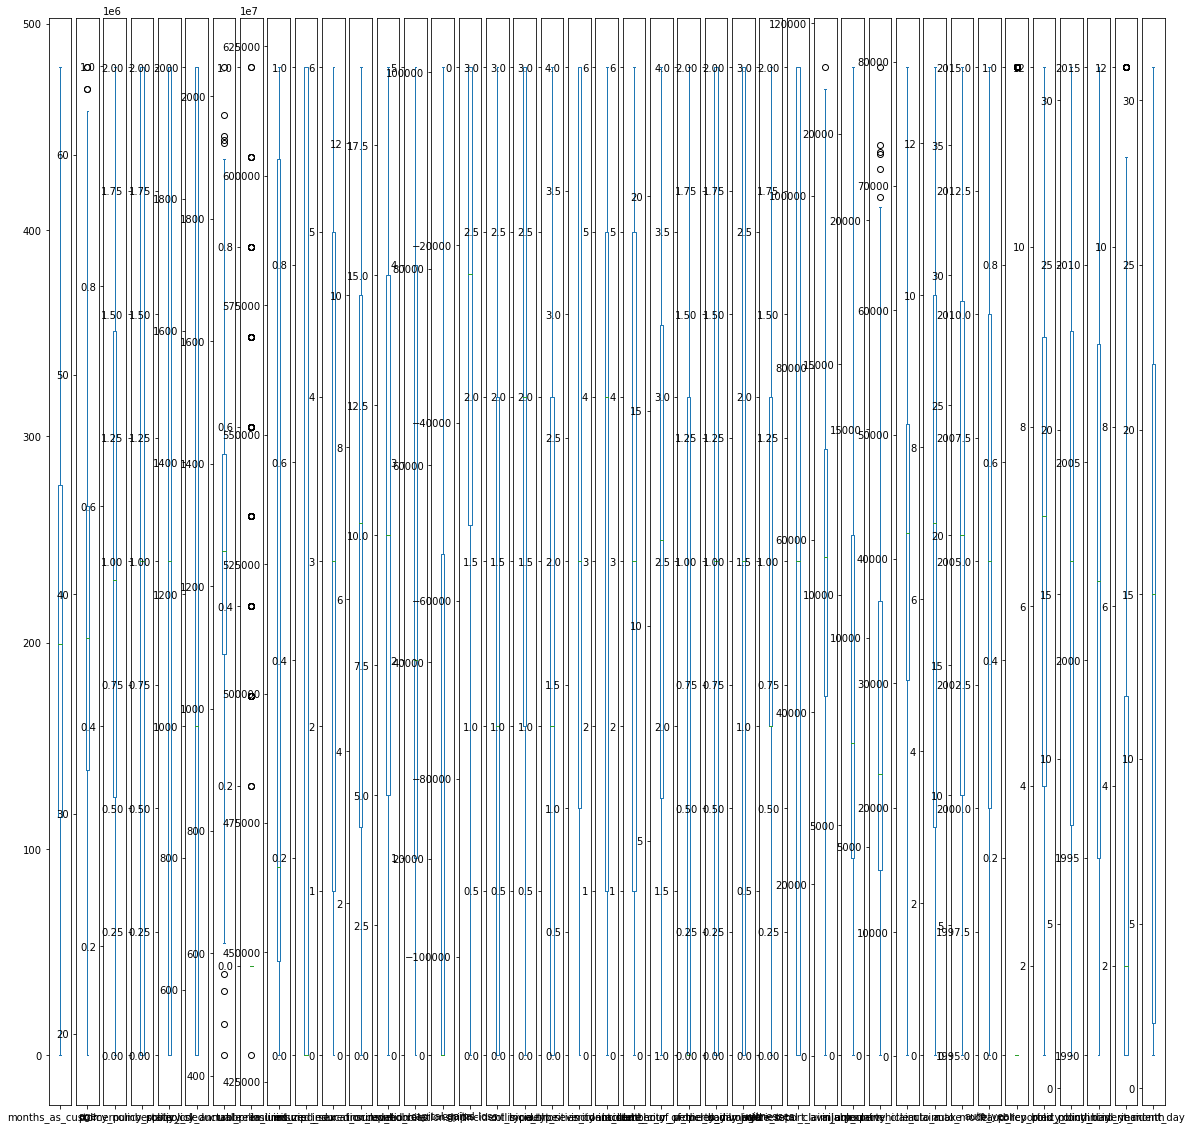

In [21]:
#plotting boxplot before removing outliers
df.plot(kind='box',subplots=True,figsize=(20,20))

In [22]:
#Checking Z-Score for Outliers
from scipy import stats
cl=df.columns.values

z1=abs(stats.zscore(df[cl]))

In [23]:
df_z=df[(z1 < 3).all(axis=1)]

In [24]:
df_z

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_day,policy_bind_year,incident_month,incident_day
0,328,48,521585,2,1,1000,1406.91,0,466132,1,...,52080,10,1,2004,1,10,17,2014,1,25
1,228,42,342868,1,1,2000,1197.22,5000000,468176,1,...,3510,8,12,2007,1,6,27,2006,1,21
2,134,29,687698,2,0,2000,1413.14,5000000,430632,0,...,23100,4,30,2007,0,6,9,2000,2,22
3,256,41,227811,0,1,2000,1415.74,6000000,608117,0,...,50720,3,34,2014,1,5,25,1990,10,1
4,228,44,367455,0,2,1000,1583.91,6000000,610706,1,...,4550,0,31,2009,0,6,6,2014,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,2,2,1000,1310.80,0,431289,0,...,61040,6,6,2006,0,7,16,1991,2,22
996,285,41,186934,0,0,1000,1436.79,0,608177,0,...,72320,13,28,2015,0,5,1,2014,1,24
997,130,34,918516,2,1,500,1383.49,3000000,442797,0,...,52500,11,19,1996,0,2,17,2003,1,23
998,458,62,533940,0,2,2000,1356.92,5000000,441714,1,...,36540,1,5,1998,0,11,18,2011,2,26


In [25]:
a=(df.shape[0]-df_z.shape[0])/df.shape[0]
print("Percentage loss of data after removing outliers",round(a*100,2))

Percentage loss of data after removing outliers 2.0


In [26]:
df_z["fraud_reported"].value_counts()

0    740
1    240
Name: fraud_reported, dtype: int64

In [27]:
from sklearn.utils import resample
dfminor_output=df_z[(df_z["fraud_reported"]==1)]
dfmajor_output=df_z[(df_z["fraud_reported"]==0)]
dfmin_up=resample(dfminor_output,replace=True,n_samples=740,random_state=42)
df_up=pd.concat([dfmin_up,dfmajor_output])

In [28]:
df_up["fraud_reported"].value_counts()

1    740
0    740
Name: fraud_reported, dtype: int64

In [29]:
df_copy=df_up.copy()

In [30]:
X=df_copy.drop("fraud_reported",axis=1)
Y=df_copy[["fraud_reported"]]

In [31]:
#Checking the Variance Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"]=X.columns

# calculating VIF for each feature

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)


                        feature           VIF
0            months_as_customer  3.147503e+01
1                           age  1.465710e+02
2                 policy_number  5.801021e+00
3                  policy_state  2.890013e+00
4                    policy_csl  2.490135e+00
5             policy_deductable  4.643236e+00
6         policy_annual_premium  2.905507e+01
7                umbrella_limit  1.288888e+00
8                   insured_zip  5.462715e+01
9                   insured_sex  2.040147e+00
10      insured_education_level  3.526195e+00
11           insured_occupation  3.899734e+00
12              insured_hobbies  3.868302e+00
13         insured_relationship  3.522690e+00
14                capital-gains  1.869683e+00
15                 capital-loss  2.006527e+00
16                incident_type  1.194727e+01
17               collision_type  6.595576e+00
18            incident_severity  2.479297e+00
19        authorities_contacted  3.115375e+00
20               incident_state  3

In [32]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(X)

X_s=pd.DataFrame(x,columns=X.columns)

In [245]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_s,Y,random_state=4,test_size=0.20)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [246]:
rf=RandomForestClassifier()


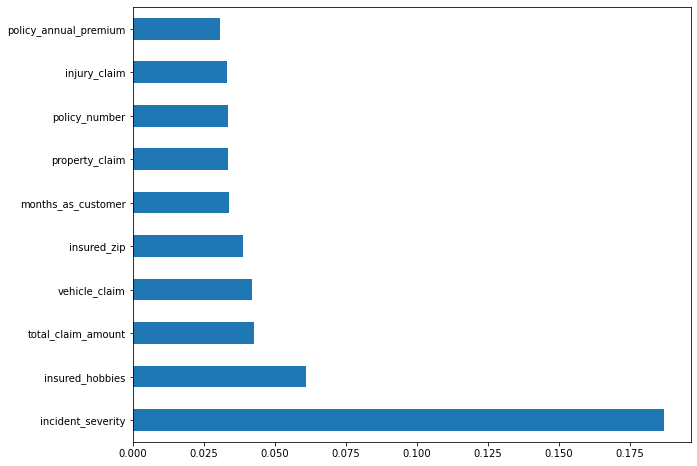

In [247]:
model=rf.fit(x_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_s.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
       

In [248]:
feat_importances.nlargest(10)

incident_severity        0.186929
insured_hobbies          0.060913
total_claim_amount       0.042837
vehicle_claim            0.041869
insured_zip              0.038992
months_as_customer       0.033969
property_claim           0.033686
policy_number            0.033403
injury_claim             0.033357
policy_annual_premium    0.030857
dtype: float64

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [34]:
selection = SelectKBest(score_func=chi2)
fit = selection.fit(X_s,Y)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_s.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  

In [36]:
print(featureScores.nlargest(10,'Score'))  #print10 best features
feat=list(featureScores.nlargest(10,'Score')['Features'])

                       Features      Score
18            incident_severity  95.477855
17               collision_type   6.121072
31                vehicle_claim   5.819137
28           total_claim_amount   4.684055
30               property_claim   3.587530
24              property_damage   3.561317
16                incident_type   3.414141
23  number_of_vehicles_involved   2.977029
12              insured_hobbies   2.748453
39                 incident_day   2.488807


In [37]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_s)

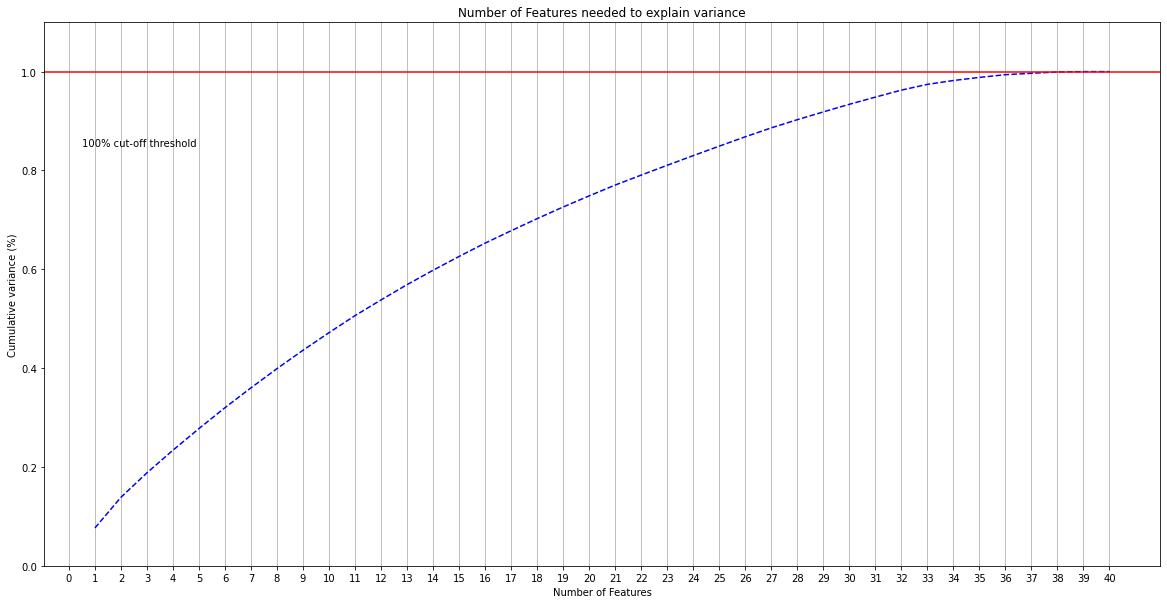

In [256]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1,41, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, linestyle='--', color='b')

plt.xlabel('Number of Features')
plt.xticks(np.arange(0,41, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Features needed to explain variance')


plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold')

ax.grid(axis='x')
plt.show()

#From the below graph, we can retain all the information with 38 features

In [38]:
pca=PCA(n_components=38)
x=pca.fit_transform(X_s)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.261479,-0.501125,-0.371124,0.130500,-0.299226,0.561879,0.027215,0.153575,-0.052224,0.249820,...,0.012111,-0.204850,0.132528,-0.293770,-0.148733,0.257886,-0.011574,-0.155737,-0.026062,0.001733
1,-0.705610,-0.278885,0.362858,-0.148840,0.318784,0.399807,0.351351,0.452732,-0.116262,-0.272880,...,-0.099755,0.267412,-0.180091,-0.363564,-0.106009,0.005688,0.113756,-0.198028,0.075654,0.030647
2,0.240368,0.730986,-0.341549,-0.222060,0.006441,0.528854,0.522961,-0.326037,-0.151850,0.039243,...,-0.102317,-0.291068,0.102075,0.051453,-0.116352,0.221180,-0.145429,-0.329405,0.167485,-0.051399
3,-0.497232,0.583966,0.736109,-0.432780,0.563021,0.119199,-0.208173,0.523362,0.389886,0.290642,...,0.325372,0.261320,0.176215,-0.018088,0.112844,-0.208578,0.020673,0.021942,0.151839,-0.011940
4,0.187899,0.445208,0.425827,0.541669,-0.355278,-0.359427,-0.658294,-0.216418,-0.347505,0.709919,...,-0.103471,0.260705,0.021581,-0.187648,-0.086078,-0.285809,-0.108263,0.020740,0.120018,-0.039706


In [39]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [47]:
lr=LogisticRegression()
rf=RandomForestClassifier()
kn=KNeighborsClassifier(n_neighbors=3)
sv=SVC()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()

lst=[lr,rf,kn,sv,dt,gb]

In [48]:
model=[]
rs=[]
acc_train=[]
acc_test=[]
f1_train=[]
f1_test=[]


In [49]:
for i1 in lst:
    for i2 in range(0,5):
        x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=i2,test_size=0.25)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        model.append(i1)
        rs.append(i2)
        acc_train.append(round(accuracy_score(y_train,pred_train),2))
        acc_test.append(round(accuracy_score(y_test,pred_test),2))
        f1_train.append(round(f1_score(y_train,pred_train),2))
        f1_test.append(round(f1_score(y_test,pred_test),2))

In [50]:
#Creating Dataframe of comparison between different models and their respective scores

modeldata=pd.DataFrame({"Model":model,"Random State":rs,"Accuracy Score-Train":acc_train,"Accuracy Score-Test":acc_test,"F1 Score-train":f1_train,"F1 Score-test":f1_test})
modeldata  

,Model,Random State,Accuracy Score-Train,Accuracy Score-Test,F1 Score-train,F1 Score-test
0,LogisticRegression(),0,0.74,0.74,0.74,0.76
1,LogisticRegression(),1,0.74,0.72,0.73,0.73
2,LogisticRegression(),2,0.75,0.71,0.75,0.69
3,LogisticRegression(),3,0.73,0.73,0.73,0.73
4,LogisticRegression(),4,0.74,0.71,0.74,0.72
5,"(DecisionTreeClassifier(max_features='auto', r...",0,1.00,0.95,1.00,0.95
6,"(DecisionTreeClassifier(max_features='auto', r...",1,1.00,0.94,1.00,0.94
7,"(DecisionTreeClassifier(max_features='auto', r...",2,1.00,0.92,1.00,0.92
8,"(DecisionTreeClassifier(max_features='auto', r...",3,1.00,0.91,1.00,0.90
9,"(DecisionTreeClassifier(max_features='auto', r...",4,1.00,0.92,1.00,0.92


##### From the above results, the Random Forest model with random state 0 and test size-0.25 the accuracy score for training data is 100% and for test data- 95% 

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=0,test_size=0.25)

# Logistic Regression

In [52]:
m1=lr.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [53]:
print(round(accuracy_score(y_train,pred_train),2)*100)

74.0


In [54]:
print(round(accuracy_score(y_test,pred_test),2)*100)

74.0


In [55]:
print(round(f1_score(y_train,pred_train),2)*100)

74.0


In [56]:
print(round(f1_score(y_test,pred_test),2)*100)

76.0


In [57]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       179
           1       0.74      0.77      0.76       191

    accuracy                           0.74       370
   macro avg       0.74      0.74      0.74       370
weighted avg       0.74      0.74      0.74       370



In [58]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [59]:
cv=KFold(n_splits=10, random_state=0, shuffle=True)

In [60]:
cv1=cross_val_score(m1,x,Y, scoring='accuracy', cv=cv)

In [61]:
print(round(cv1.mean(),2)*100)

71.0


# Random Forest Classifier

In [62]:
m2=rf.fit(x_train,y_train)
pred_train=m2.predict(x_train)
pred_test=m2.predict(x_test)

In [63]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [64]:
print(round(accuracy_score(y_test,pred_test),2)*100)

95.0


In [65]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [66]:
print(round(f1_score(y_test,pred_test),2)*100)

95.0


In [67]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       179
           1       0.96      0.94      0.95       191

    accuracy                           0.95       370
   macro avg       0.95      0.95      0.95       370
weighted avg       0.95      0.95      0.95       370



In [68]:
cv=KFold(n_splits=10, random_state=0, shuffle=True)
cv1=cross_val_score(m2,x,Y, scoring='accuracy', cv=cv)

In [69]:
print(round(cv1.mean(),2)*100)

94.0


In [70]:
print(confusion_matrix(y_test,pred_test))

[[172   7]
 [ 11 180]]


# KNeighbors Classifier

In [282]:
m3=kn.fit(x_train,y_train)
pred_train=m3.predict(x_train)
pred_test=m3.predict(x_test)

In [283]:
print(round(accuracy_score(y_train,pred_train),2)*100)

88.0


In [284]:
print(round(accuracy_score(y_test,pred_test),2)*100)

75.0


In [285]:
print(round(f1_score(y_train,pred_train),2)*100)

89.0


In [286]:
print(round(f1_score(y_test,pred_test),2)*100)

78.0


In [287]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72       223
           1       0.70      0.89      0.78       221

    accuracy                           0.75       444
   macro avg       0.77      0.75      0.75       444
weighted avg       0.77      0.75      0.75       444



In [288]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m3,x,Y, scoring='accuracy', cv=cv)

In [289]:
print(round(cv1.mean(),2)*100)

78.0


# SVC

In [290]:
m4=sv.fit(x_train,y_train)
pred_train=m4.predict(x_train)
pred_test=m4.predict(x_test)

In [291]:
print(round(accuracy_score(y_train,pred_train),2)*100)

96.0


In [292]:
print(round(accuracy_score(y_test,pred_test),2)*100)

86.0


In [293]:
print(round(f1_score(y_train,pred_train),2)*100)

96.0


In [294]:
print(round(f1_score(y_test,pred_test),2)*100)

87.0


In [295]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       223
           1       0.82      0.92      0.87       221

    accuracy                           0.86       444
   macro avg       0.87      0.86      0.86       444
weighted avg       0.87      0.86      0.86       444



In [296]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m4,X_s,Y, scoring='accuracy', cv=cv)

In [297]:
print(round(cv1.mean(),2)*100)

85.0


# Decision Tree Classifier

In [298]:
m5=dt.fit(x_train,y_train)
pred_train=m5.predict(x_train)
pred_test=m5.predict(x_test)

In [299]:
print(round(accuracy_score(y_train,pred_train),2)*100)

100.0


In [300]:
print(round(accuracy_score(y_test,pred_test),2)*100)

83.0


In [301]:
print(round(f1_score(y_train,pred_train),2)*100)

100.0


In [302]:
print(round(f1_score(y_test,pred_test),2)*100)

85.0


In [303]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       223
           1       0.77      0.95      0.85       221

    accuracy                           0.83       444
   macro avg       0.85      0.83      0.83       444
weighted avg       0.85      0.83      0.83       444



In [304]:
cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m5,x,Y, scoring='accuracy', cv=cv)

In [305]:
print(round(cv1.mean(),2)*100)

85.0


# Gaussian NB

In [306]:
m6=gb.fit(x_train,y_train)
pred_train=m6.predict(x_train)
pred_test=m6.predict(x_test)

In [307]:
print(round(accuracy_score(y_train,pred_train),2)*100)

76.0


In [308]:
print(round(accuracy_score(y_test,pred_test),2)*100)

86.0


In [309]:
print(round(f1_score(y_train,pred_train),2)*100)

76.0


In [310]:
print(round(f1_score(y_test,pred_test),2)*100)

87.0


In [311]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85       223
           1       0.82      0.92      0.87       221

    accuracy                           0.86       444
   macro avg       0.87      0.86      0.86       444
weighted avg       0.87      0.86      0.86       444



In [312]:
cv=KFold(n_splits=10, random_state=0, shuffle=True)
cv1=cross_val_score(m6,x,Y, scoring='accuracy', cv=cv)

In [313]:
print(round(cv1.mean(),2)*100)

74.0


# Hyperparameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [76]:
param_dist={"max_depth": [10,20,30],"criterion": ["gini", "entropy","log_loss"],"min_samples_leaf":[1,2,3,4]}

In [78]:
samples=5  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=4)

In [79]:
final=randomCV.fit(x_train,y_train)

In [80]:
print(final.best_params_)

{'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini'}


In [81]:
pred1=final.predict(x_test)
pred2=final.predict(x_train)

In [82]:
print(round(accuracy_score(y_train,pred2),2)*100)

100.0


In [83]:
print(round(accuracy_score(y_test,pred1),2)*100)

93.0


In [85]:
print(confusion_matrix(y_test,pred1))

[[162  17]
 [  9 182]]


# Results

From the confusion matrix after tuning the False Negative has reduced from 11 to 9.

# Saving Model

In [86]:
import pickle
pickle.dump(final, open('Insurance_fraud.pkl', 'wb'))

In [87]:
pickled_model=pickle.load(open('Insurance_fraud.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,